***

</b> Calculating Risk-vs-Returns Using Sharpe Ratio
--
***
<b>Datasets Used:</b>

- Historical stock prices of Facebook `NASDAQ:FB` & Amazon `NASDAQ:AMZN` in 2016
- Historical prices of S&P500 index in 2016

<b>Note:</b>


Introduction to Sharpe Ratio
---

<p>An investment is worth considering if it returns more money than it costs. But returns is only one of the many considerations. Another important consideration is risk, because investment risks can result in a wide range of possible outcomes (which can sometimes be very adverse)! 
    
<b>So how does one compare different investments that may deliver similar results, but involve different levels of risk?</b></p>
<p><img width="200" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_66/img/sharpe.jpeg"></p>


<p>Meet William Sharpe. He introduced the <a href="https://web.stanford.edu/~wfsharpe/art/sr/sr.htm"><b>reward-to-variability ratio</b></a> in 1966 that came to be known as the <b>Sharpe Ratio</b>:
    
<img src='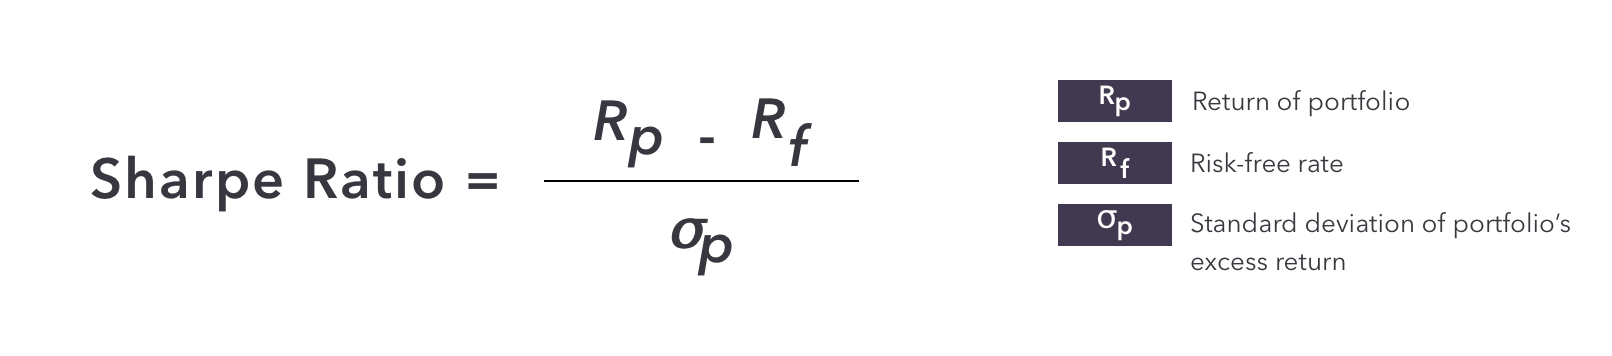
'/>
    
<b>What is the Sharpe ratio?</b> 
- In summary, it calculates the <b>additional return per unit of risk</b> an investor could obtain by choosing one investment over the other. To quantity this, it compares investment returns against the standard deviation of returns as a measure of risk. 
- As a popular risk-vs-return metric, it is a commonly-used indicator by fund managers for portfolio optimisation.
- A higher Sharpe ratio means <b>an investment yields higher returns for a same amount of risk</b>. It is common to compare a specific invesment opportunity against a benchmark that well-represents an entire category of investments, also known as a risk-free investment. Some examples of commonly used risk-free investments includes: LIBOR, Treasury bills or even putting money in banks.

Let's learn about the Sharpe ratio by comparing this metric for <b>stocks of the two tech giants, Facebook and Amazon</b>. As a benchmark, we'll use the S&amp;P 500 index as our benchmark. This index captures the performance of the 500 largest stocks in the US at any given point in time.

Here is a more comprehensive & technical explanation of the Sharpe Ratio:

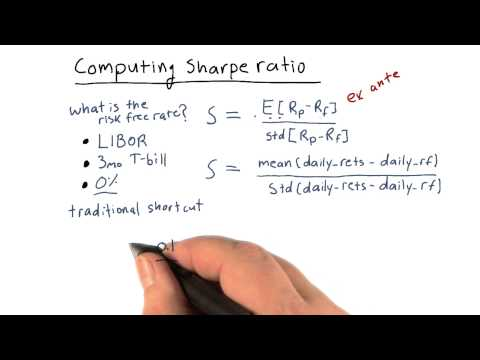

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('s0bxoD_0fAU', width=800, height=600)

Sharpe ratio is also well-used in the world of algorithmic trading. This [resource](https://www.quantstart.com/articles/Sharpe-Ratio-for-Algorithmic-Trading-Performance-Measurement/) describes how this metric is used to measure algorithmic trading performance.

In [52]:
## Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('seaborn-pastel') 
%matplotlib inline

#Load stock_data and benchmark_data csvs
stock_data_df = pd.read_csv('data/stock_data.csv',index_col ='Date',parse_dates= True)
benchmark_data_df = pd.read_csv("data/benchmark_data.csv",index_col = 'Date', parse_dates= True).dropna()
stock_data_df.dropna()
stock_data_df.head



<bound method NDFrame.head of                 Amazon    Facebook
Date                              
2016-01-04  636.989990  102.220001
2016-01-05  633.789978  102.730003
2016-01-06  632.650024  102.970001
2016-01-07  607.940002   97.919998
2016-01-08  607.049988   97.330002
...                ...         ...
2016-12-23  760.590027  117.269997
2016-12-27  771.400024  118.010002
2016-12-28  772.130005  116.919998
2016-12-29  765.150024  116.349998
2016-12-30  749.869995  115.050003

[252 rows x 2 columns]>

Understanding key statistics of the data
---

Let's take a look at the data you loaded to understand how we can use these data for analysis.

- Display a summary of each DataFrame's contents with <code>.info()</code>
-  Show the first few lines of each DataFrame with <code>.head()</code>

In [53]:

stock_data_df.info()
stock_data_df.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Amazon    252 non-null    float64
 1   Facebook  252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


,Amazon,Facebook
Date,,
2016-01-04,636.989990,102.220001
2016-01-05,633.789978,102.730003
2016-01-06,632.650024,102.970001
2016-01-07,607.940002,97.919998
2016-01-08,607.049988,97.330002


In [54]:
benchmark_data_df.info()
benchmark_data_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


,S&P 500
Date,
2016-01-04,2012.66
2016-01-05,2016.71
2016-01-06,1990.26
2016-01-07,1943.09
2016-01-08,1922.03


From the above output, we can now see the number of data rows **(252 rows)** and columns we have at our disposal.

Plot daily prices for Amazon and Facebook
---

Plot and summarise the information contained in `stock_data`.


,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902502
max,844.359985,133.279999


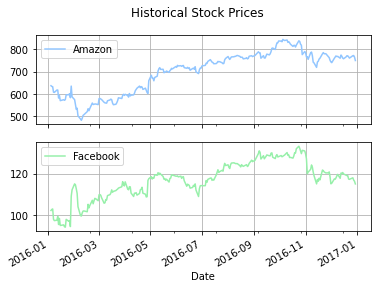

In [55]:
stock_data_df.plot(subplots = True, title = 'Historical Stock Prices',legend = True, grid = True)
stock_data_df.describe()


Visualise daily prices of the S&P 500 index
---

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


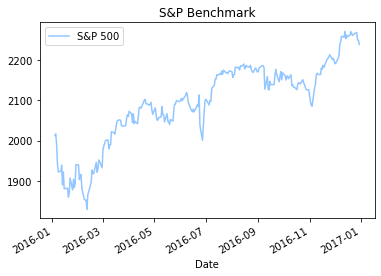

In [56]:
## Write your code below

stock_returns = benchmark_data_df.plot(title='S&P Benchmark')
benchmark_data_df.describe()



Transform stock_data prices and S&P 500 benchmark prices to calculate daily returns
---

The Sharpe ratio formula requires <b>investment returns</b> as input, but our data only provides historical prices and not the investment returns. To derive the returns, we must first calculate the <b>percentage change in prices from one day to the next</b>.<br>


<bound method NDFrame.head of               Amazon  Facebook
Date                          
2016-01-04       NaN       NaN
2016-01-05 -0.005024  0.004989
2016-01-06 -0.001799  0.002336
2016-01-07 -0.039058 -0.049043
2016-01-08 -0.001464 -0.006025
...              ...       ...
2016-12-23 -0.007503 -0.001107
2016-12-27  0.014213  0.006310
2016-12-28  0.000946 -0.009237
2016-12-29 -0.009040 -0.004875
2016-12-30 -0.019970 -0.011173

[252 rows x 2 columns]>

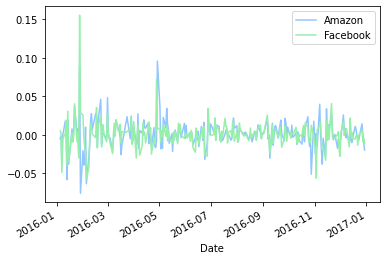

In [68]:

stock_returns= stock_data_df.pct_change(1)
stock_returns.plot()
stock_returns.head


Date
2016-01-04         NaN
2016-01-05    0.002012
2016-01-06   -0.013115
2016-01-07   -0.023700
2016-01-08   -0.010838
Name: S&P 500, dtype: float64

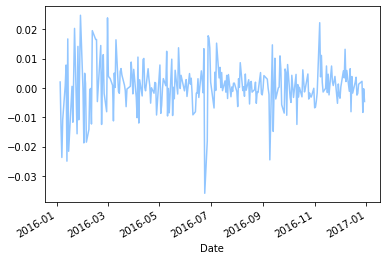

In [83]:

benchmark_pctchange = benchmark_data_df['S&P 500'].pct_change(1)

benchmark_pctchange.plot()
benchmark_pctchange.head()

PCalculate Excess Returns for Amazon and Facebook vs. S&P 500
---

 Calculate the relative performance of each stock versus the S&amp;P 500 benchmark. This is calculated as the difference in returns between <b>stock_returns</b> and <b>sp_returns</b> for each day.<br>

In summary:

<img src='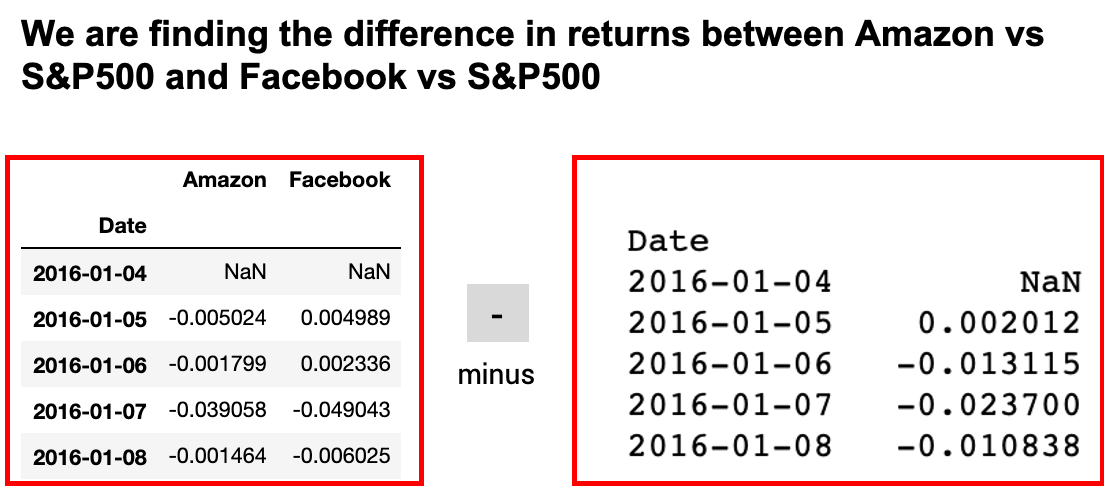
' width='600' height='400'/>



,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


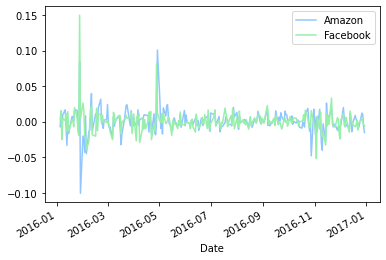

In [88]:
## Write your code below

excess_returns = stock_returns.sub(benchmark_pctchange, axis = 0 )
excess_returns.plot()
excess_returns.describe()

The Average Difference in Daily Returns Stocks vs S&P 500
---

Start computing the Sharpe ratio. First we need to calculate the average of the <code>excess_returns</code>. This tells us how much more or less the investment yields per day compared to the benchmark.<br> 

In summary:

<img src='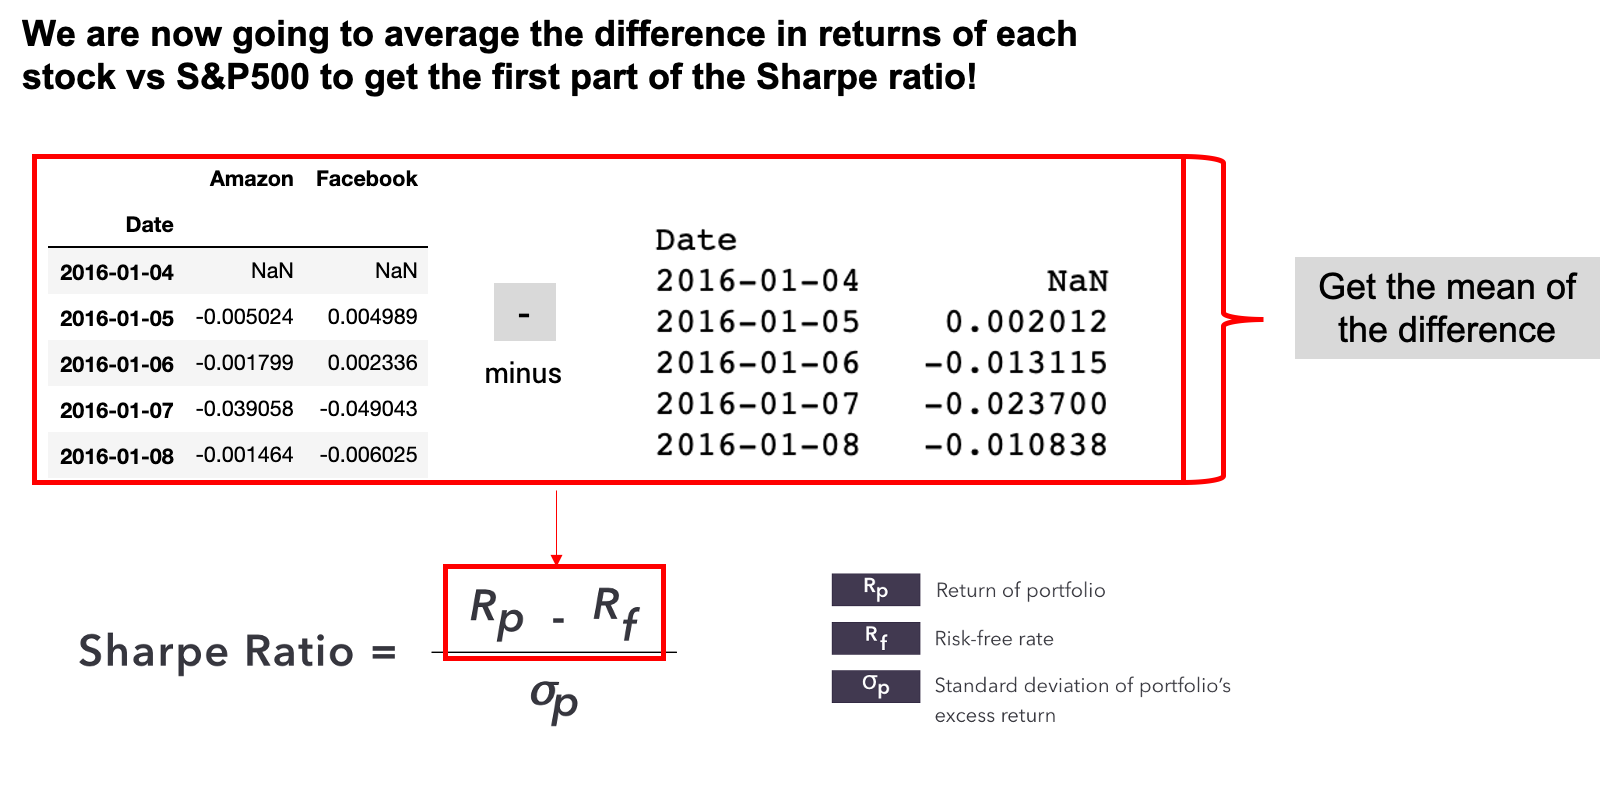
' width='600' height='400'/>

Calculate and plot the mean of excess_returns:<br>

- Calculate the average of <code>excess_returns</code> using <code>.mean()</code> and assign the result to <code>avg_excess_return</code>
- Plot the result using the pandas method <code>.plot.bar()</code> and set <code>'Mean of the Return Difference'</code> as the title.


<AxesSubplot:title={'center':'Mean of the Return Difference'}>

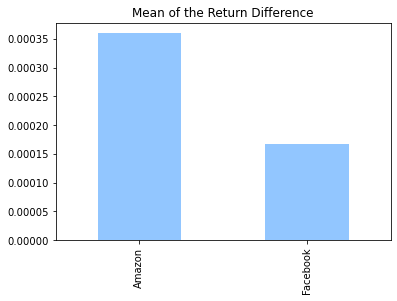

In [89]:
## Write your code below

avg_excess_return = excess_returns.mean()
avg_excess_return.plot.bar(title = 'Mean of the Return Difference')



Standard Deviation of the Return Difference
---

It looks like there was quite a bit of a difference between average daily returns for Amazon and Facebook. Next calculate the standard deviation of the <code>excess_returns</code>. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&amp;P 500.<br>

Calculate and visualize the standard deviation of <code>excess_returns:</code><br>

In summary:

<img src='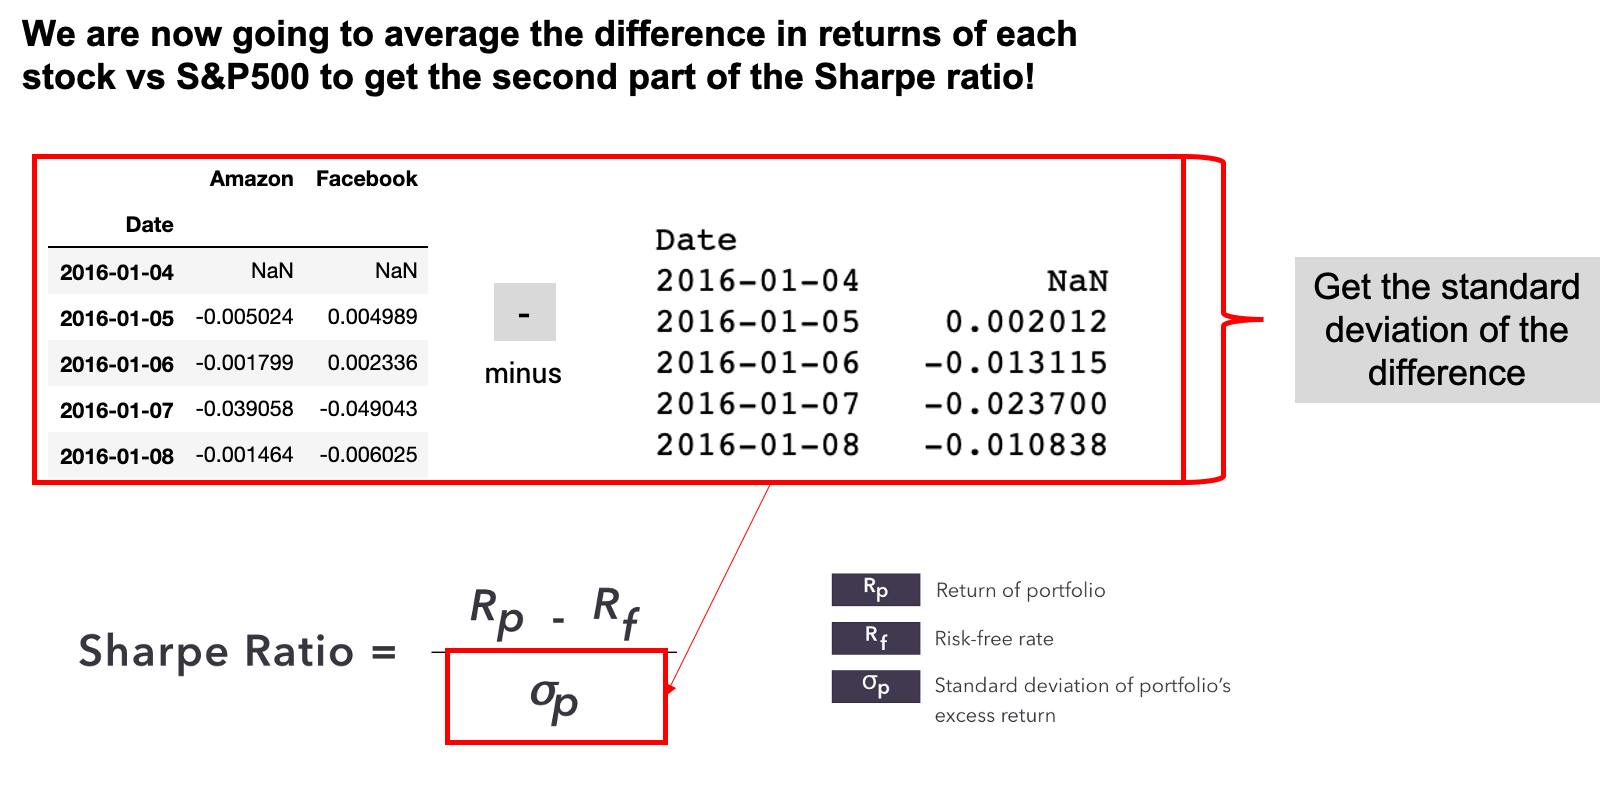
' width='600' height='400'/>


[]

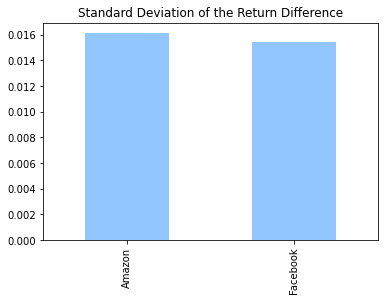

In [90]:

sd_excess_return = excess_returns.std()

sd_excess_return.plot.bar(title ="Standard Deviation of the Return Difference" , rot = 90).plot()






Collating the Sharpe ratio
---

Now we just need to compute the ratio of <code>avg_excess_returns</code> and <code>sd_excess_returns</code>. The result is now finally the <b>Sharpe ratio</b> and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.<br>

The Sharpe Ratio is often <b>annualized</b> by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays): √252<br>

In summary:

<img src='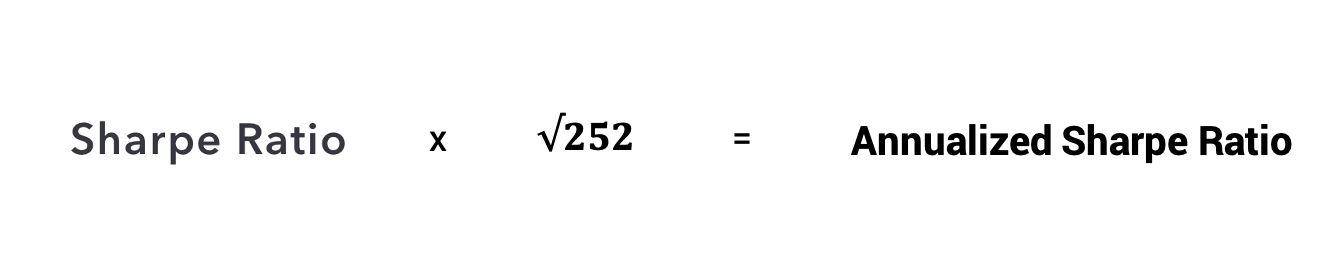
'/>
.

<AxesSubplot:title={'center':'Annualized Sharpe Ratio: Stocks vs S&P 500'}>

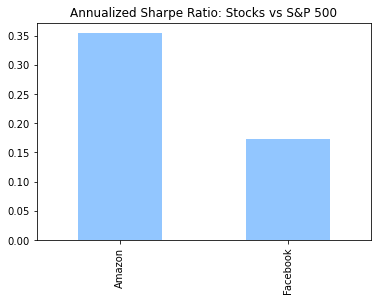

In [93]:
## Write your code below


daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Stocks vs S&P 500')


#As such from the chart below it can be seen that Amazon has the higher sharpe ratio hence better investment as compared to Facebook


---